In [1]:
# for this project we'll use numpy to compute, and
# matplotlib to plot. If you haven't already, you can
# install these by running E.g.
#
#      conda install numpy
#
# and
#
#      conda install matplotlib
#
# in your terminal.


import numpy
import matplotlib.pyplot



Suppose that we have two random variables, $X$ and $Y$, independent, and with some identical distribution. 

What's the distribution of $Z = X + Y$ ?

In general, this will depend on what the 'identical distribution' was. 

For sake of example, let's look at the uniform distribution over the support (i.e. set of possible values) $\{0,1,2,3,4\}$. Sometimes we like to call this $\mathscr{U}\big(\{0,1,2,3,4\}\big)$.

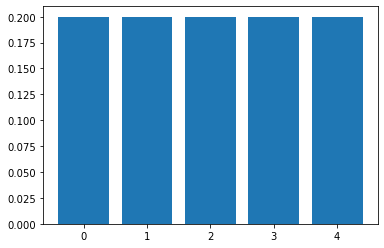

In [2]:
# Here's a representation of the uniform distribution over [0,1,2,3,4]:
p = [0.2, 0.2, 0.2, 0.2, 0.2] # these probs must sum to 1!
x = list(range(5)) # here is the support of the distribution
matplotlib.pyplot.bar(x, p);

Since each of $X$ and $Y$ will be one of $\{0,1,2,3,4\}$, Z will be one of $\{0,1,2,...,8\}$; the distribution of $Z$ over this support is called the convolution of $\mathscr{U}\big(\{0,1,2,3,4\}\big)$ with itself. 

What does this distribution look like? We can resolve this by looking at each possible value separately, and dividing up the outcomes that result in that respective value.

For example, what is the probability that $Z = 0$ ? This is equal to the chance that $X$ and $Y$ are both 0.

What's the probability that $Z=1$ ? This is the probability that $X=1$ and $Y=0$ plus the probability that $X=0$ and $Y=1$.

What's the probability that $Z=2$ ? This is the probability that $X=2$ and $Y=0$ plus the probability that $X=1$ and $Y=1$ plus . . . (you can see this gets tedious!)

Happily NumPy, like any good numerical package, includes a function that convolves two distributions for us. Let's wrap it into a new function to convolve a distribution with itself, and use it to plot the convolution of the distribution we started with.

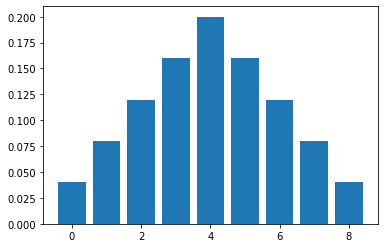

In [3]:
def convl(probs):
    """compute convolution of a distribution with itself"""
    return numpy.convolve(probs, probs)

pp = convl(p) # this computes the convolution we want
xx = list(range(9)) # here is the convolved support
matplotlib.pyplot.bar(xx, pp);

Notice that central values are more likely, and values at the boundaries are relatively less likely than they were before, as the chances are 'averaging out.' This is typically the case. In fact, when we repeat this we start to see the central limit theorem kicking in!

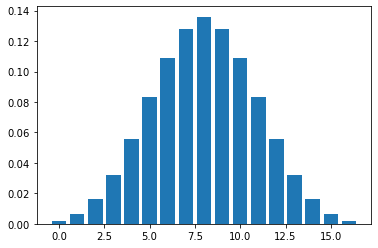

In [4]:
pppp = convl(pp) 
xxxx = list(range(17)) 
matplotlib.pyplot.bar(xxxx, pppp);

When we start with a different distribution over $\{0,1,2,3,4\}$, we'll get a different convolution back (although by the CLT, if we repeat the process enough we're going to eventually get something bell shaped!). For example:

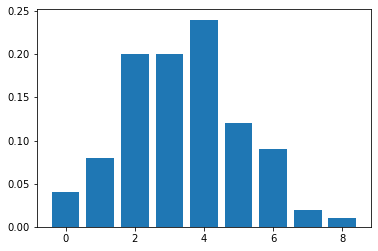

In [5]:
p = [0.2, 0.2, 0.4, 0.1, 0.1] # here's a skewed, mound-shaped distribution
pp = convl(p)
matplotlib.pyplot.bar(xx, pp);

Is it ever possible for the convolutions to *temporarily* (i.e. before iterating a few times) make things *less* bell shaped?

For example, is it possible to find a unimodal distribution (i.e. mound-shaped, with only one peak) such that its convolution is bimodal (has two peaks)? Try for yourself!